# Column Generation Rough


In [10]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from exputils.extent.cg import calculate_extent_CG
from exputils.state.random_ket import make_random_quantum_state

In [11]:
sns.set_theme("paper")
rc = {"mathtext.fontset": "stix"}
plt.rcParams.update(rc)


def visualize_result(n_qubit, extends, max_values):
    fig = plt.figure(figsize=(6.5, 5))
    ax1 = plt.subplot(1, 2, 1)
    ax2 = plt.subplot(1, 2, 2)
    # plot extends to ax1 with seaborn
    sns.lineplot(x=list(range(1, len(extends) + 1)), y=extends, ax=ax1, marker="o")
    ax1.set_xlabel("Iteration", fontsize=25)
    ax1.set_ylabel("Objective Value", fontsize=25)
    ax1.set_xticks(list(range(1, len(extends) + 1)))
    sns.lineplot(
        x=list(range(1, len(max_values) + 1)), y=max_values, ax=ax2, marker="o"
    )
    ax2.set_xlabel("Iteration", fontsize=25)
    ax2.set_ylabel("Max Violation", fontsize=25)
    ax2.set_xticks(list(range(1, len(max_values) + 1)))
    # fig.suptitle("(a)" if n_qubit == 7 else "(b)", fontsize=25, y=0.85, x=0.05)
    plt.tight_layout()
    plt.savefig(f"../image/CG_real_{n_qubit}.pdf", bbox_inches="tight")
    plt.show()

n=8
CG: n=8, method='mosek'
start: calculate dots
[k|progress|range]: 1 | 1.30816e+05/4.17804e+13 | [0.08817, 0.27203] | 14[ms]
[k|progress|range]: 2 | 2.22390e+07/4.17804e+13 | [0.20052, 0.32288] | 337[ms]
[k|progress|range]: 3 | 1.61403e+09/4.17804e+13 | [0.25778, 0.36472] | 1212[ms]
[k|progress|range]: 4 | 5.42491e+10/4.17804e+13 | [0.29233, 0.37845] | 2101[ms]
[k|progress|range]: 5 | 8.69244e+11/4.17804e+13 | [0.31411, 0.38718] | 2630[ms]
[k|progress|range]: 6 | 6.66477e+12/4.17804e+13 | [0.32750, 0.39819] | 2981[ms]
[k|progress|range]: 7 | 2.41882e+13/4.17804e+13 | [0.33393, 0.39819] | 3471[ms]
[k|progress|range]: 8 | 4.17804e+13/4.17804e+13 | [0.33592, 0.39819] | 3623[ms]
 calculation time : 3623[ms]
iteration: 1 / 30, Amat.shape = (256, 10000)
start: solve SOCP
stabilizer_extent=7.782196325370294
start: calculate dual dots
[k|progress|range]: 1 | 1.30816e+05/4.17804e+13 | [nan, nan] | 3[ms]
[k|progress|range]: 2 | 2.22390e+07/4.17804e+13 | [nan, nan] | 74[ms]
[k|progress|range]:

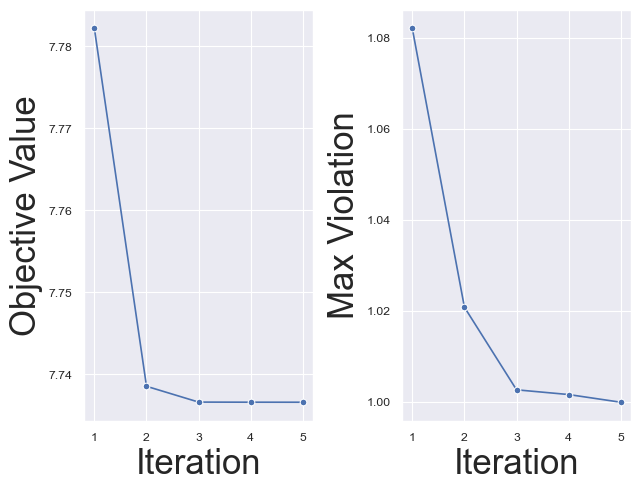

In [12]:
import time

n = 8
seed = 0
kind = "pure"
print(f"{n=}")

np.random.seed(seed)
psi = make_random_quantum_state(kind, n, seed)
psi.imag = 0.0
psi /= np.linalg.norm(psi)

t0 = time.perf_counter()
stabilizer_extent, extends, max_values, _ = calculate_extent_CG(n, psi)
t1 = time.perf_counter()
print(f"{stabilizer_extent=} {t1-t0=}")

with open(f"../data/CG_real/{kind}_{n}_data.txt", mode="w") as f:
    for i in range(len(extends)):
        print(f"{extends[i]} {max_values[i]}", file=f)

with open(f"../data/CG_real/{kind}_{n}_time.txt", mode="w") as f:
    print(t1 - t0, file=f)

visualize_result(n, extends, max_values)